# Testing various cross-validation schemes

In [1]:
import numpy as np

In [2]:
hyper_searchs = np.load('./CV-test_TMC-Cr-Gaussian.txt_5-hyper-runs.npy', allow_pickle=True)
hyper_searchs.shape
#len(hyper_searchs[1][:])
hyper_searchs[0]
np.savetxt('data2.dat', hyper_searchs[0])

In [3]:
eta_set = {s:[] for s in set(hyper_searchs[0,:,3])}
eta_set
for hyp in hyper_searchs[0]:
    eta_set[hyp[3]].append(hyp)
all = []
for k,v in eta_set.items():
    v = np.array(v)
    ind = np.argsort(v[:,2])
    eta_set[k]=v[ind]
    all.extend(eta_set[k])

all = np.array(all)
all
np.savetxt('data2.dat', all)

In [4]:
ind = np.argsort(hyper_searchs[0,:,2])
error_ind = hyper_searchs[0][ind]
print(error_ind[:10])

[[24.433825800281163 3.065147507901819 1e-10 1000.0]
 [40.72363534132956 11.327707368459786 1e-10 1.0]
 [38.0976553081659 2.295304710171244 1e-10 1000000.0]
 [36.1536201054531 6.198942168397391 1e-10 3.1622776601683795]
 [35.29447574985553 1.9877449655370028 1e-10 316227.7660168379]
 [31.94517142691687 3.055400012148992 1e-10 10.0]
 [26.799353454584416 2.604554976516956 1e-10 10000.0]
 [26.183433742908466 2.0055942677443284 1e-10 100.0]
 [32.692500890609715 1.8485014019086263 1e-10 100000.0]
 [24.603740453858467 2.7154224857689666 1e-10 316.22776601683796]]


In [5]:
# from mpl_toolkits import mplot3d
# %matplotlib inline
# import matplotlib.pyplot as plt

In [41]:
%reload_ext gnuplot_kernel

In [12]:
%gnuplot inline svg size 1000,500

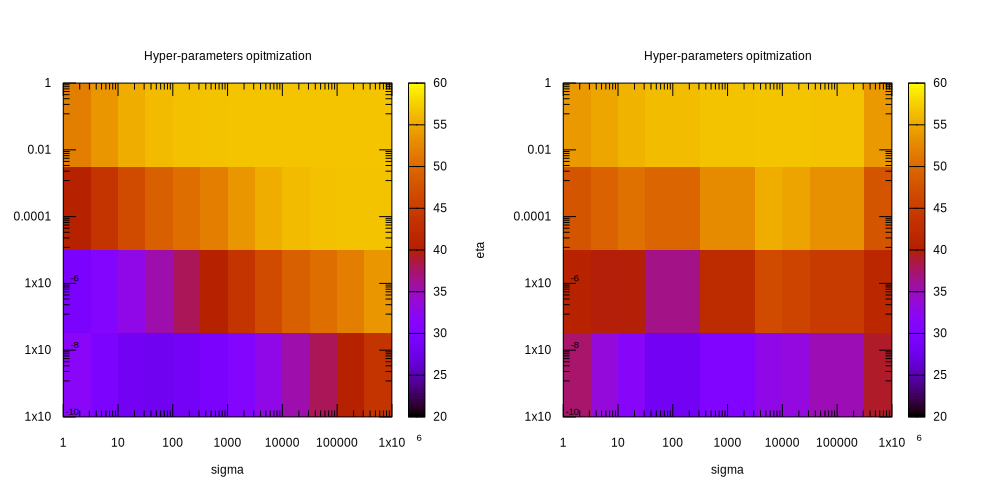

In [13]:
%%gnuplot
set multiplot layout 1,2
set title "Hyper-parameters opitmization"
set log y
set log x
set xlabel 'sigma'
set ylabel 'eta'
set pm3d map
files="./data1.dat ./data2.dat"
splot './data1.dat'
splot './data2.dat'
unset multiplot

In [15]:
    lcs = np.load('./CV-test_TMC-Cr-Gaussian.txt_5-lc-runs.npy')

In [16]:
lcs.shape
for i,l in enumerate(lcs):
    np.savetxt(f"{i}-lc_TMC-Cr-Gaussian.txt", l)

In [46]:
%reload_ext gnuplot_kernel
%gnuplot inline svg size 1000,500

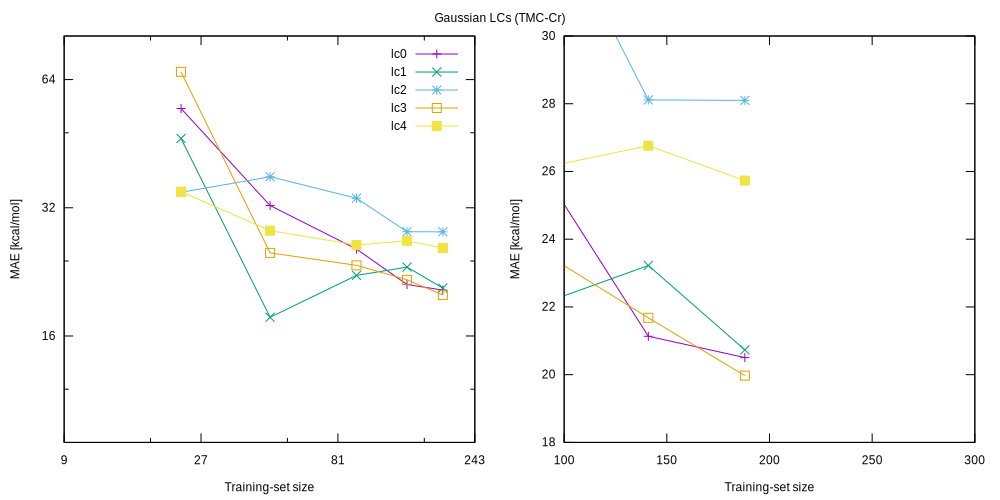

In [63]:
%%gnuplot
set multiplot layout 1,2 title "Gaussian LCs (TMC-Cr)"
set ylabel 'MAE [kcal/mol]'
set xlabel "Training-set size"
unset xrange
set xrange [:]
set log xy 3
plot for [i =0:4:1] sprintf("%i",i)."-lc_TMC-Cr-Gaussian.txt" u 1:2 w lp t "lc".sprintf("%i",i)
unset log
set xrange [100:300]
set ytics 2
plot for [i =0:4:1] sprintf("%i",i)."-lc_TMC-Cr-Gaussian.txt" u 1:2 w lp noti
unset multiplot

**differences between training set is within 8 [kcal/mol]**

In [58]:
laplacians = np.load("./LC-TMC-Cr_Laplacian_5-lc-runs.npy")

In [59]:
for i,l in enumerate(laplacians):
    np.savetxt(f"{i}-lc_TMC-Cr-Laplacian.txt", l)

In [46]:
%reload_ext gnuplot_kernel
%gnuplot inline svg size 1000,500

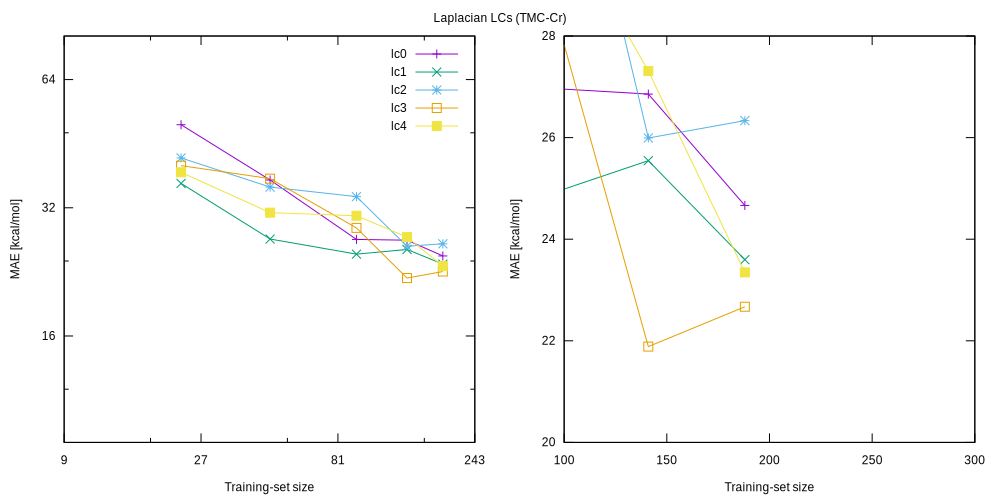

In [64]:
%%gnuplot
set multiplot layout 1,2 title "Laplacian LCs (TMC-Cr)"
set ylabel 'MAE [kcal/mol]'
set xlabel "Training-set size"
unset xrange
set xrange [:]
set log xy 3
plot for [i =0:4:1] sprintf("%i",i)."-lc_TMC-Cr-Laplacian.txt" u 1:2 w lp t "lc".sprintf("%i",i)
unset log
set xrange [100:300]
set ytics 2
plot for [i =0:4:1] sprintf("%i",i)."-lc_TMC-Cr-Laplacian.txt" u 1:2 w lp noti
unset multiplot

In [65]:
%reload_ext gnuplot_kernel
%gnuplot inline svg 1000,500

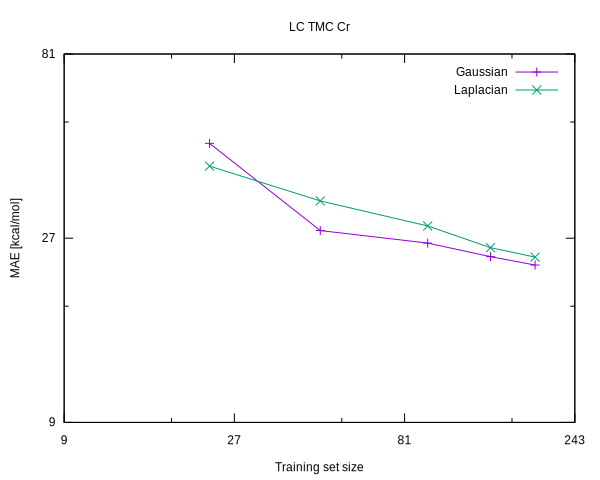

In [70]:
%%gnuplot
set log xy 3
set title 'LC TMC Cr'
set xlabel "Training set size"
set ylabel "MAE [kcal/mol]"
plot './CV-test_TMC-Cr-Gaussian.txt' u 1:2 w lp t 'Gaussian' ,\
    './LC-TMC-Cr_Laplacian' u 1:2 w lp t 'Laplacian'